# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 622


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        pprint(city_weather)
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
#Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mae ramat
{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 16.984, 'lon': 98.5166},
 'dt': 1699912899,
 'id': 1152202,
 'main': {'feels_like': 23.21,
          'grnd_level': 994,
          'humidity': 92,
          'pressure': 1014,
          'sea_level': 1014,
          'temp': 22.5,
          'temp_max': 22.5,
          'temp_min': 22.5},
 'name': 'Mae Ramat',
 'sys': {'country': 'TH', 'sunrise': 1699918174, 'sunset': 1699959069},
 'timezone': 25200,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 39, 'gust': 1.04, 'speed': 1.1}}
Processing Record 2 of Set 1 | isafjordur
{'base': 'stations',
 'clouds': {'all': 82},
 'cod': 200,
 'coord': {'lat': 66.0755, 'lon': -23.124},
 'dt': 1699912901,
 'id': 3415667,
 'main': {'feels_like': -1.96,
       

In [23]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          602
Lat           602
Lng           602
Max Temp      602
Humidity      602
Cloudiness    602
Wind Speed    602
Country       602
Date          602
dtype: int64

In [24]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mae ramat,16.9840,98.5166,22.50,92,92,1.10,TH,1699912899
1,isafjordur,66.0755,-23.1240,1.89,83,82,3.99,IS,1699912901
2,bilibino,68.0546,166.4372,-28.15,100,100,2.17,RU,1699912903
3,waitangi,-43.9535,-176.5597,13.00,86,3,9.44,NZ,1699912904
4,vicuna,-30.0319,-70.7081,25.98,32,81,3.13,CL,1699912905


In [25]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [26]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mae ramat,16.9840,98.5166,22.50,92,92,1.10,TH,1699912899
1,isafjordur,66.0755,-23.1240,1.89,83,82,3.99,IS,1699912901
2,bilibino,68.0546,166.4372,-28.15,100,100,2.17,RU,1699912903
3,waitangi,-43.9535,-176.5597,13.00,86,3,9.44,NZ,1699912904
4,vicuna,-30.0319,-70.7081,25.98,32,81,3.13,CL,1699912905


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

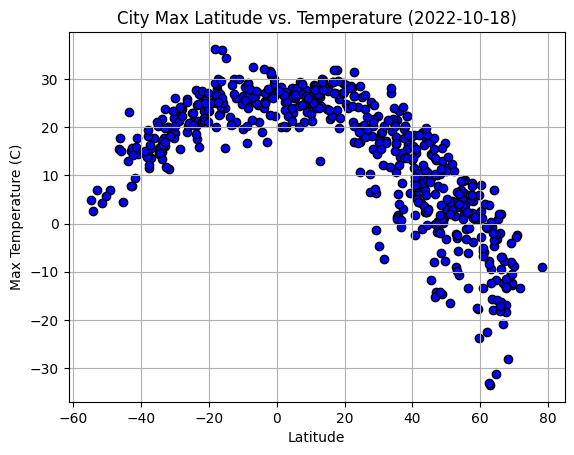

In [27]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

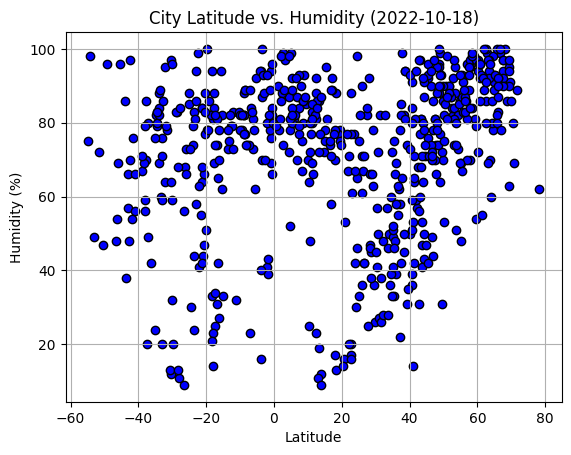

In [28]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

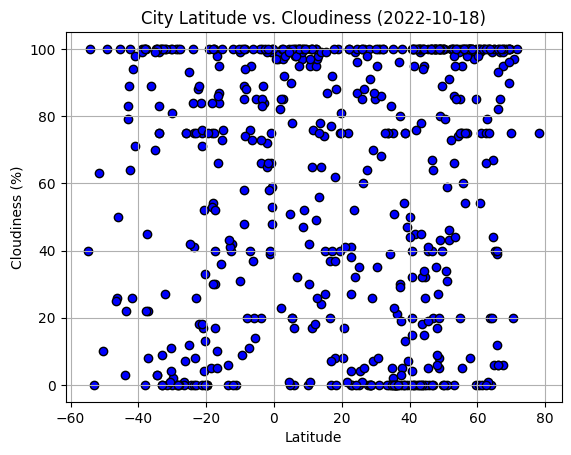

In [29]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

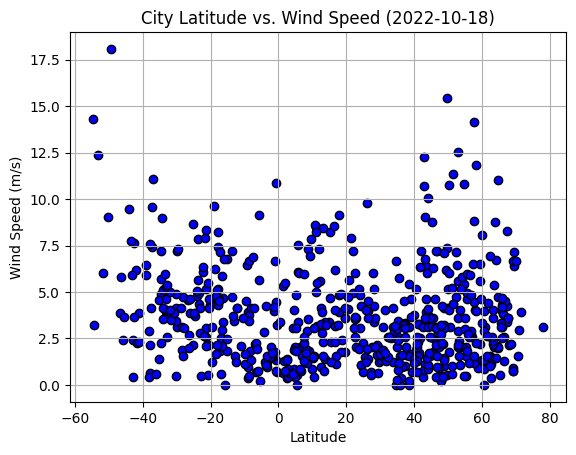

In [30]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [31]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mae ramat,16.9840,98.5166,22.50,92,92,1.10,TH,1699912899
1,isafjordur,66.0755,-23.1240,1.89,83,82,3.99,IS,1699912901
2,bilibino,68.0546,166.4372,-28.15,100,100,2.17,RU,1699912903
5,ayr,55.4627,-4.6339,8.99,93,75,2.06,GB,1699912907
8,hamilton,39.1834,-84.5333,17.69,31,0,4.63,US,1699912702


In [33]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,waitangi,-43.9535,-176.5597,13.00,86,3,9.44,NZ,1699912904
4,vicuna,-30.0319,-70.7081,25.98,32,81,3.13,CL,1699912905
6,adamstown,-25.0660,-130.1015,23.02,85,93,8.65,PN,1699912908
7,bethanie,-26.4833,17.1500,25.87,9,1,2.69,NaN,1699912909
9,sechura,-5.5569,-80.8222,24.62,62,14,9.17,PE,1699912911


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.7189062940475197


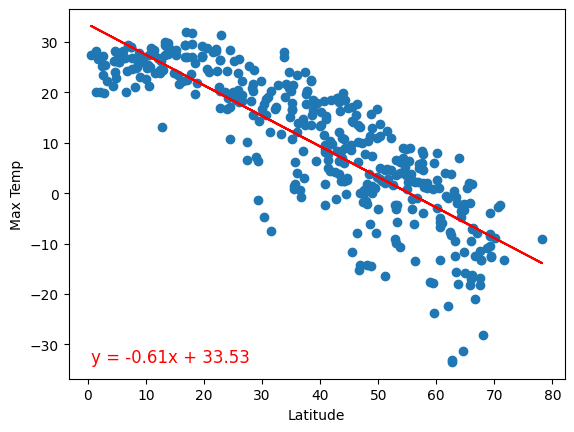

In [34]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red', label='Linear Regression Line')
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"R squared: {rvalue**2}")

R squared: 0.5923200994703998


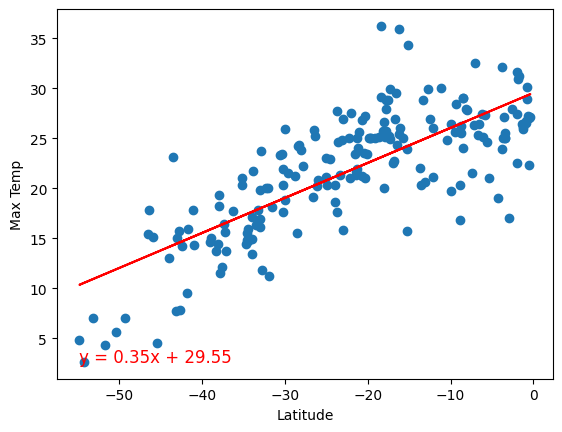

In [35]:
# Linear regression on Southern Hemisphere
x_values2 = southern_hemi_df["Lat"]
y_values2 = southern_hemi_df["Max Temp"]
slope, intercept, rvalue, pvalue, stderr = linregress(x_values2, y_values2)
regress_values = x_values2 * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
plt.scatter(x_values2, y_values2)
plt.plot(x_values2, regress_values, color='red', label='Linear Regression Line')
plt.annotate(line_eq, (x_values2.min(), y_values2.min()), fontsize=12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"R squared: {rvalue**2}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.0608146434824097


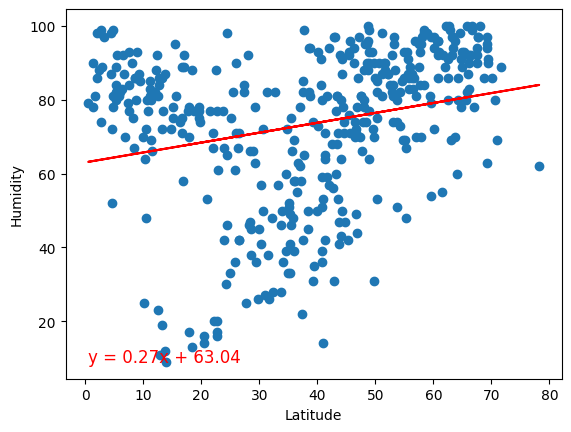

In [36]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red', label='Linear Regression Line')
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"R squared: {rvalue**2}")

R squared: 0.018799301139527384


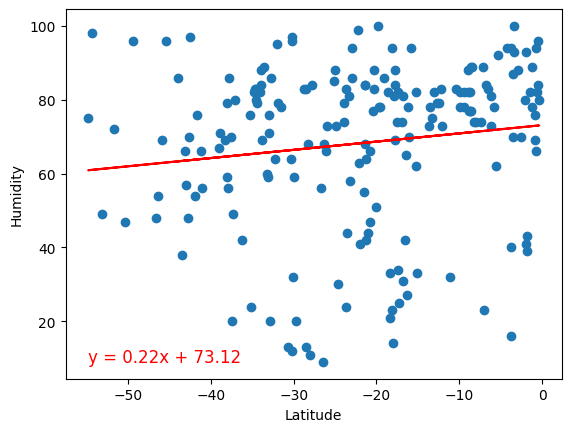

In [37]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red', label='Linear Regression Line')
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"R squared: {rvalue**2}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.0036171717834620944


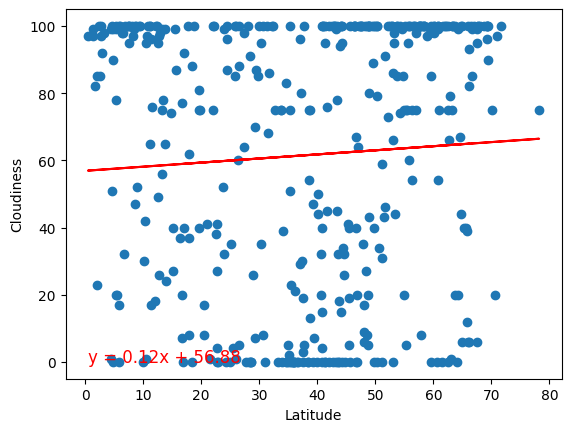

In [38]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red', label='Linear Regression Line')
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"R squared: {rvalue**2}")

R squared: 0.006462795703879816


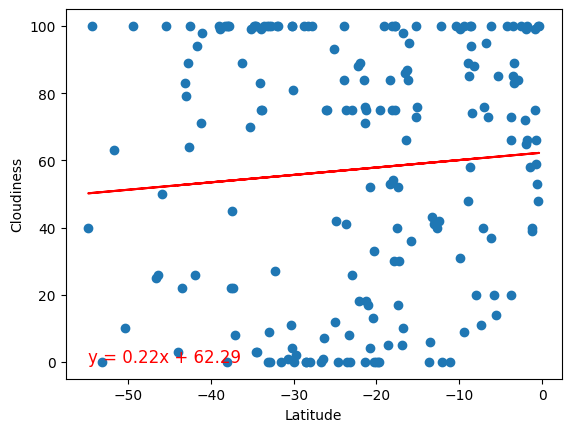

In [39]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red', label='Linear Regression Line')
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"R squared: {rvalue**2}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.007903590288282417


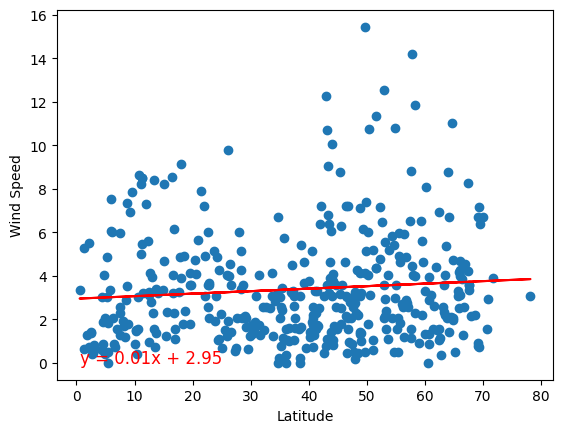

In [40]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red', label='Linear Regression Line')
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"R squared: {rvalue**2}")

R squared: 0.1433744758372233


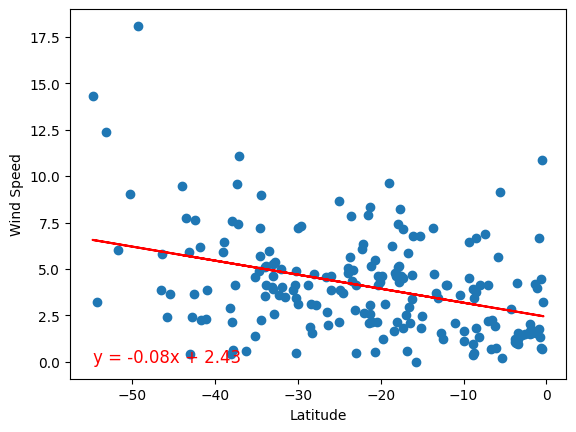

In [41]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red', label='Linear Regression Line')
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"R squared: {rvalue**2}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE